In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import os
import prince
os.chdir(r'C:\Users\QQ\Documents\Learning\The Data Science Course')
sns.set(style="darkgrid")

In [43]:
data = pd.read_csv('train-set.csv')
df = data.copy()

In [44]:
df.head()

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Category 4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Category 6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Category 6,A


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      8068 non-null   int64  
 1   Gender          8068 non-null   object 
 2   Married         7928 non-null   object 
 3   Age             8068 non-null   int64  
 4   Graduated       7990 non-null   object 
 5   Profession      7944 non-null   object 
 6   WorkExperience  7239 non-null   float64
 7   SpendingScore   8068 non-null   object 
 8   FamilySize      7733 non-null   float64
 9   Category        7992 non-null   object 
 10  Segmentation    8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [46]:
df.dropna(inplace= True)
df.drop(['CustomerID', 'Segmentation'], axis =1, inplace = True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          6665 non-null   object 
 1   Married         6665 non-null   object 
 2   Age             6665 non-null   int64  
 3   Graduated       6665 non-null   object 
 4   Profession      6665 non-null   object 
 5   WorkExperience  6665 non-null   float64
 6   SpendingScore   6665 non-null   object 
 7   FamilySize      6665 non-null   float64
 8   Category        6665 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 520.7+ KB


### Univariate Visualization

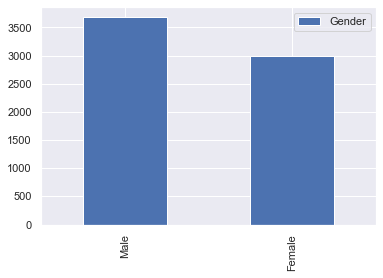

In [48]:
pd.DataFrame(df['Gender'].value_counts()).plot(kind='bar')
categorical_vars = ['Gender', 'Married', 'Age', 'Graduated', 'Profession']

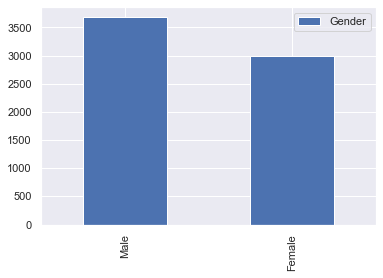

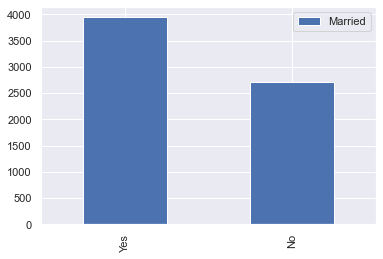

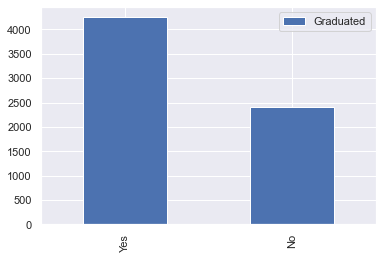

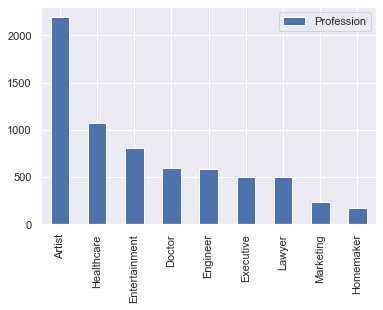

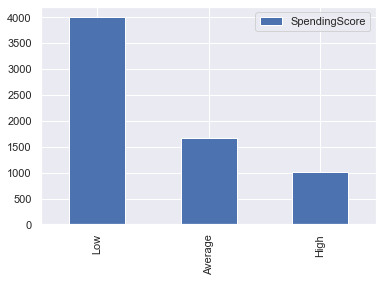

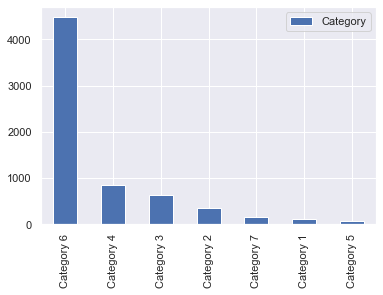

In [49]:
categorical_vars = ['Gender', 'Married', 'Graduated', 'Profession','SpendingScore', 'Category']

for var in categorical_vars:
    feature_df = pd.DataFrame(df[var].value_counts())
    feature_df.plot(kind = 'bar')

In [50]:
cont_vars = []
for var in df.columns:
    i = var in categorical_vars
    if i==False:
        cont_vars.append(var)
cont_vars

['Age', 'WorkExperience', 'FamilySize']

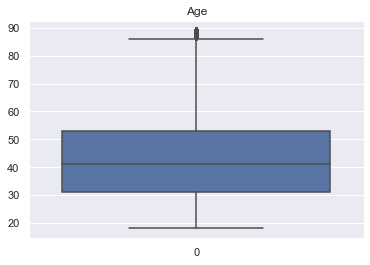

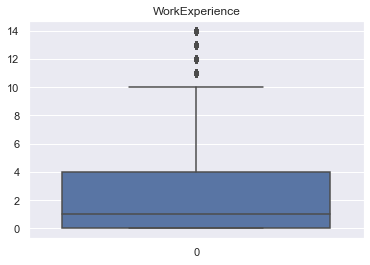

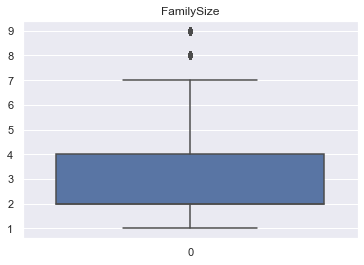

<Figure size 432x288 with 0 Axes>

In [51]:
for var in cont_vars:
    sns.boxplot(data = df[var]).set_title(var)
    plt.figure()

### FAMD

In [97]:
famd = prince.FAMD(n_components = 7,
                  n_iter =2,
                  copy = True,
                  check_input = True,
                  engine = 'auto',
                  random_state = 42)

In [98]:
famd_mod = famd.fit(df)

In [99]:
sum(famd_mod.explained_inertia_)

0.5686219863940747

In [100]:
df_famd = pd.DataFrame(famd_mod.row_coordinates(df))

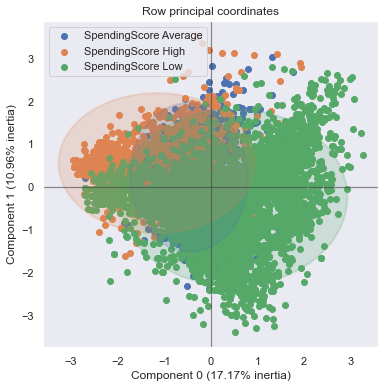

In [101]:
axes = famd.plot_row_coordinates(df,
                                x_component = 0,
                                y_component = 1,
                                color_labels =['SpendingScore {}'.format(t) for t in df['SpendingScore']],
                                ellipse_outline = True,
                                ellipse_fill = True,
                                show_points = True)

### K-Means

In [104]:
wcss = []
for i in range(1,14):
    kmeans = KMeans(i)
    kmeans.fit(df_famd)
    wcss_i = kmeans.inertia_
    wcss.append(wcss_i)

Text(0, 0.5, 'WCSS')

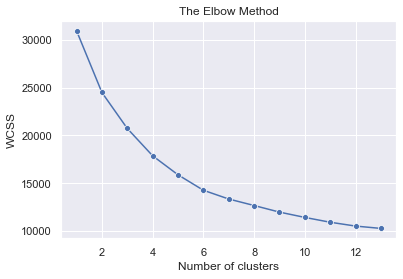

In [105]:
cluster_range = range(1,14)
# plt.plot(cluster_range,wcss)
sns.lineplot(x=cluster_range, y=wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [106]:
kmeans = KMeans(4)
kmeans.fit(df_famd)
df_famd['cluster'] = kmeans.predict(df_famd)


In [107]:
df_famd.head()

,0,1,2,3,4,5,6,cluster
0,1.939534,0.892175,-0.527598,0.462096,-0.263532,0.359179,0.081050,3
2,-1.437903,-0.497694,-0.796268,0.085568,1.136174,0.394298,0.364550,2
3,-2.172843,0.539807,-0.249643,1.066227,-0.182287,-0.492880,-0.325080,0
5,-1.053524,0.438337,-0.118455,-0.563879,-0.452784,0.469578,0.124181,2
6,0.910293,0.116167,-0.772365,0.028538,-0.748469,-0.737275,-0.023465,3


In [65]:
kmeans_df = df.join(df_famd['cluster'], how = 'left')

In [66]:
kmeans_df

,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,cluster
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4,4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6,2
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Category 6,1
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Category 6,3
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Category 6,4
...,...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Category 6,3
8064,Male,No,35,No,Executive,3.0,Low,4.0,Category 4,4
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Category 6,2
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Category 6,4


In [122]:
kmeans_df.columns
for i in kmeans_df.columns:
    print (kmeans_df[i].dtype)

object
object
int64
object
object
float64
object
float64
object
int32


### EDA on Dataframe of Original Features with new Clusters

<AxesSubplot:xlabel='cluster', ylabel='count'>

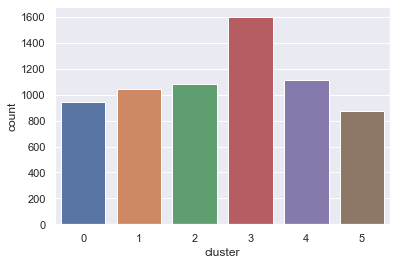

In [134]:
sns.freq(x = kmeans_df['cluster'])

In [126]:
k_exp_df = kmeans_df.copy()
k_exp_df.drop('cluster', axis = 1, inplace = True)
k_cat_vars = [var for var in k_exp_df.columns if k_exp_df[var].dtype == 'object']
k_cont_vars = [var for var in k_exp_df.columns if k_exp_df[var]. dtype != 'object']

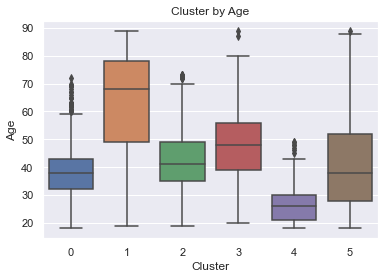

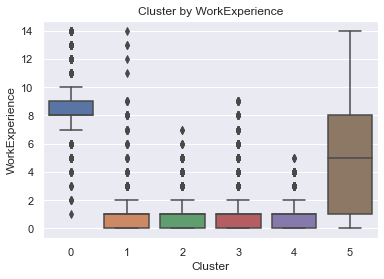

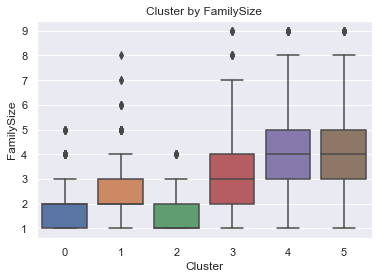

In [141]:
for cont_var in k_cont_vars:
    plt.figure()
    sns.boxplot(x = kmeans_df['cluster'], y = kmeans_df[cont_var])
    plt.xlabel('Cluster')
    plt.ylabel(cont_var)
    plt.title('Cluster by ' + cont_var)

<Figure size 432x288 with 0 Axes>

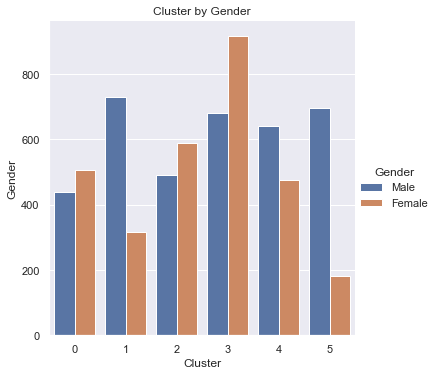

<Figure size 432x288 with 0 Axes>

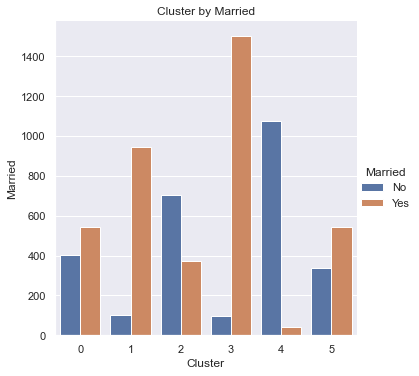

<Figure size 432x288 with 0 Axes>

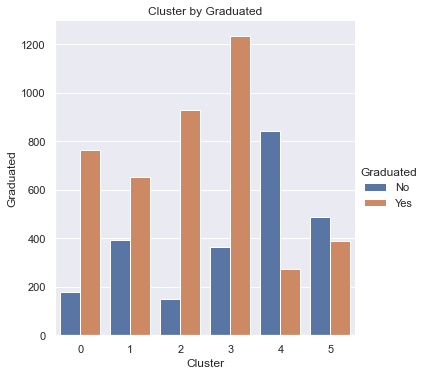

<Figure size 432x288 with 0 Axes>

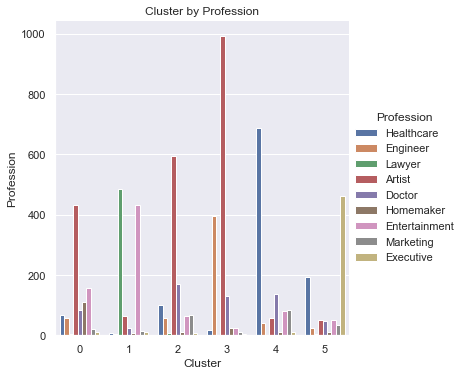

<Figure size 432x288 with 0 Axes>

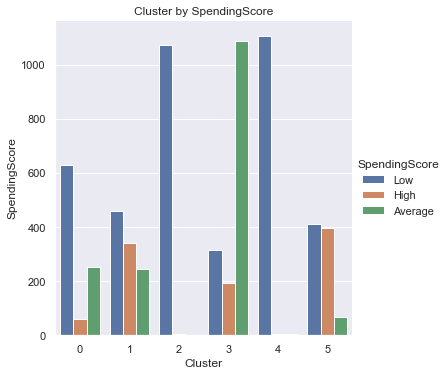

<Figure size 432x288 with 0 Axes>

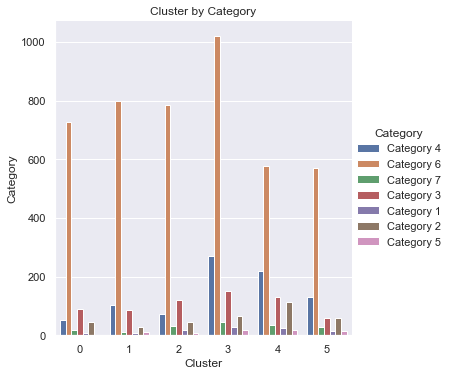

In [154]:
for cat_var in k_cat_vars:
    plt.figure()
    sns.catplot(x = 'cluster', hue = cat_var, data = kmeans_df, kind = 'count' )
    plt.xlabel('Cluster')
    plt.ylabel(cat_var)
    plt.title('Cluster by ' + cat_var)

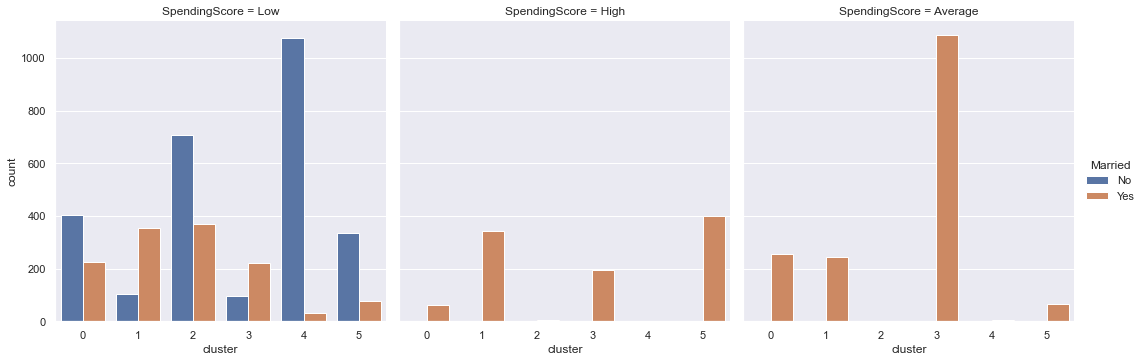

In [147]:
sns.catplot(x='cluster', hue='Married', col = 'SpendingScore', data=kmeans_df, kind = 'count')